In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import os
from IPython.display import display
from bioinfokit import visuz
import matplotlib.pyplot as plt

### Compute p values

In [2]:
def get_results(data):
    p_values = []
    for i, col in enumerate(data.columns[2:]):
        if i % 1000 == 0: print('         ', i)
        p_values.append(chi2_contingency(pd.crosstab(data['PHENOTYPE'], data[col]))[1])
    snp = data.columns[2:]
    significant_snp = []
    for i, p in enumerate(p_values):
        significant_snp.append((snp[i], p))
    df = pd.DataFrame(significant_snp, columns=['SNP', 'p_value'])
    return df

In [ ]:
for i in range(1, 23):
    name = 'march_data/chr%s.txt' %i
    data = pd.read_table(name, sep=' ')
    df = get_results(data)
    df.to_csv('March_GWAS/chr%s_GWAS' %i)

### Manhattan Plot

In [2]:
res = []
for i in range(1, 23):
    table = pd.read_csv('March_GWAS/chr%s_GWAS' %i, index_col=0)
    table['chromosome'] = ['chromosome %s' %i]*table.shape[0]
    res.append(table)

In [11]:
df = pd.concat(res).reset_index(drop=True)
df['chromosome'] = df['chromosome'].apply(lambda x: 'chr' + x.split()[1])

In [13]:
markernames = dict(zip(df[df['p_value'] < 1e-08]['SNP'], df[df['p_value'] < 1e-08]['SNP']))

In [14]:
visuz.marker.mhat(df=df, chr='chromosome',pv='p_value',
                  gwas_sign_line=True, gwasp=1e-08, dim=(16,6),
                  markernames=markernames, markeridcol='SNP', gstyle=2)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


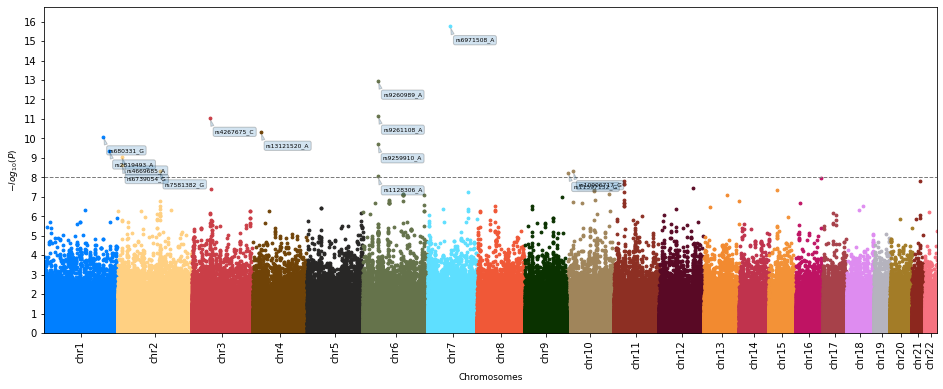

In [15]:
visuz.marker.mhat(df=df, chr='chromosome',pv='p_value', show=True,
                  gwas_sign_line=True, gwasp=1e-08, dim=(16,6),
                  markernames=markernames, markeridcol='SNP', gstyle=2)